## Imports 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import time

2023-11-13 16:04:24.744582: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 16:04:24.744673: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 16:04:24.744702: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 16:04:24.753670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 16:04:25.741256: W tensorflow/compiler/

### Cheking GPU access 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


2023-11-13 16:04:27.305957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 16:04:27.417245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 16:04:27.417318: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## MNIST Dataset

The MNIST dataset is a collection of handwritten digits commonly used for training image processing systems. It consists of 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image of a handwritten digit.

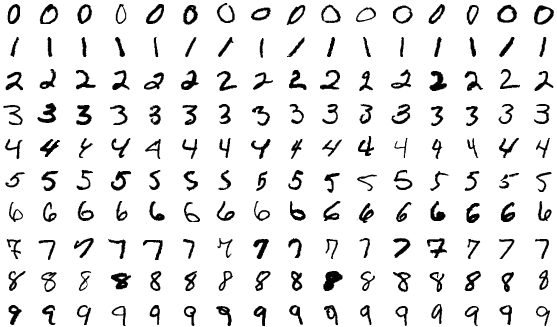

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Loading data

11490434/11490434 [==============================] - 3s 0us/step


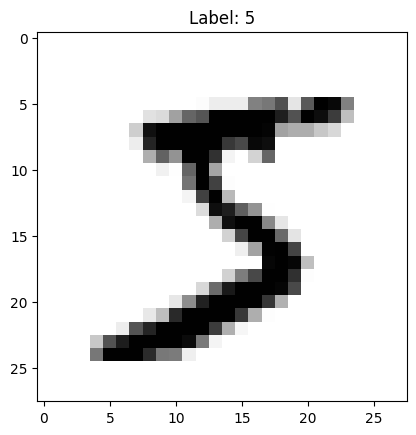

In [4]:
# One sample from the dataset
plt.imshow(x_train[0], cmap='gist_yarg')
plt.title('Label: ' + str(y_train[0]));

Transforming our Ys that are a 1D array of 60000 columns into a array of shape (60000, 10), where each line will be fiiled using One Hot encoder.

In [5]:
# Original labels
display(y_train)
print("First number is 5.")
# One hot encoded labels
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)
print(f'First line of the encoded label has a 1 in the fifth position: {y_cat_train[0]}')

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

First number is 5.
First line of the encoded label has a 1 in the fifth position: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In order to not run into gradient problems these values should be scaled between 0 and 1

In [6]:
x_train = x_train/255
x_test = x_test/255
print(f'Scale: [{x_train.min()}, {x_train.max()}]')

Scale: [0.0, 1.0]


Reshape to include the single RGB channel dimension

In [7]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Training the model ⚙️ 

### Model 🤖

In [8]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2023-11-13 16:04:32.031889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 16:04:32.032276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 16:04:32.032410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 16:04:33.846083: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 16:04:33.846191: I tensorflow/compile

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

## Training ⚙️

In [10]:
start_time = time.time()
model.fit(x_train, y_cat_train, epochs=4, validation_data=(x_test,y_cat_test), callbacks=[early_stop])
final_time = time.time() - start_time
# time in minutes
final_time = final_time / 60
print(f"Training time: {round(final_time, 2)} minutes")

Epoch 1/4


2023-11-13 16:04:37.544899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8900
2023-11-13 16:04:40.231702: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:521] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.8
  /usr/local/cuda
  /opt/conda/lib/python3.11/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /opt/conda/lib/python3.11/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
2023-11-13 16:04:40.350104: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe8

InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/conda/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/conda/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/opt/conda/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/conda/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/conda/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/conda/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_420/4157628894.py", line 2, in <module>

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/opt/conda/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/opt/conda/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/opt/conda/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/opt/conda/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/opt/conda/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/opt/conda/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_961]

## Predcting and checking classification report 📄

In [ ]:
predictions = model.predict(x_test)
classes_x = np.argmax(predictions, axis = 1)

In [ ]:
print(classification_report(y_test, classes_x))

Good results! =D